<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.985440,38.832495,0.000723,89.818658,89.817862,0.000796
1,0.0,1.0,49.041484,93.976069,0.000315,153.017868,153.017155,0.000712
2,0.0,2.0,74.453706,99.125180,-0.000043,183.578842,183.578876,-0.000034
3,0.0,3.0,25.522049,20.758594,-0.003244,56.277398,56.280458,-0.003060
4,0.0,4.0,70.980859,69.216590,-0.000382,150.197068,150.197632,-0.000564
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,42.593935,59.664267,-0.000619,112.257583,112.258265,-0.000682
59996,999.0,56.0,74.793293,34.326597,0.000921,119.120812,119.120070,0.000742
59997,999.0,57.0,20.390945,38.163060,-0.000090,68.553916,68.554236,-0.000320
59998,999.0,58.0,41.261901,42.626270,0.000142,93.888313,93.888344,-0.000031


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.985440  38.832495  0.000723   89.818658   89.817862  0.000796
      1.0    49.041484  93.976069  0.000315  153.017868  153.017155  0.000712
      2.0    74.453706  99.125180 -0.000043  183.578842  183.578876 -0.000034
      3.0    25.522049  20.758594 -0.003244   56.277398   56.280458 -0.003060
      4.0    70.980859  69.216590 -0.000382  150.197068  150.197632 -0.000564
...                ...        ...       ...         ...         ...       ...
999.0 55.0   42.593935  59.664267 -0.000619  112.257583  112.258265 -0.000682
      56.0   74.793293  34.326597  0.000921  119.120812  119.120070  0.000742
      57.0   20.390945  38.163060 -0.000090   68.553916   68.554236 -0.000320
      58.0   41.261901  42.626270  0.000142   93.888313   93.888344 -0.000031
      59.0   97.333337  55.901185  0.000446  163.234968  163.234533  0.000435

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.985440  38.832495  0.000723   89.818658   89.817862  0.000796
      1.0    49.041484  93.976069  0.000315  153.017868  153.017155  0.000712
      2.0    74.453706  99.125180 -0.000043  183.578842  183.578876 -0.000034
      3.0    25.522049  20.758594 -0.003244   56.277398   56.280458 -0.003060
      4.0    70.980859  69.216590 -0.000382  150.197068  150.197632 -0.000564
...                ...        ...       ...         ...         ...       ...
999.0 55.0   42.593935  59.664267 -0.000619  112.257583  112.258265 -0.000682
      56.0   74.793293  34.326597  0.000921  119.120812  119.120070  0.000742
      57.0   20.390945  38.163060 -0.000090   68.553916   68.554236 -0.000320
      58.0   41.261901  42.626270  0.000142   93.888313   93.888344 -0.000031
      59.0   97.333337  55.901185  0.000446  163.234968  163.234533  0.000435

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.985440,38.832495,0.000723,89.818658,89.817862,0.000796
1,0.0,1.0,49.041484,93.976069,0.000315,153.017868,153.017155,0.000712
2,0.0,2.0,74.453706,99.125180,-0.000043,183.578842,183.578876,-0.000034
3,0.0,3.0,25.522049,20.758594,-0.003244,56.277398,56.280458,-0.003060
4,0.0,4.0,70.980859,69.216590,-0.000382,150.197068,150.197632,-0.000564
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,42.593935,59.664267,-0.000619,112.257583,112.258265,-0.000682
59996,999.0,56.0,74.793293,34.326597,0.000921,119.120812,119.120070,0.000742
59997,999.0,57.0,20.390945,38.163060,-0.000090,68.553916,68.554236,-0.000320
59998,999.0,58.0,41.261901,42.626270,0.000142,93.888313,93.888344,-0.000031


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.985440  38.832495  0.000723   89.818658   89.817862  0.000796
      1.0    49.041484  93.976069  0.000315  153.017868  153.017155  0.000712
      2.0    74.453706  99.125180 -0.000043  183.578842  183.578876 -0.000034
      3.0    25.522049  20.758594 -0.003244   56.277398   56.280458 -0.003060
      4.0    70.980859  69.216590 -0.000382  150.197068  150.197632 -0.000564
...                ...        ...       ...         ...         ...       ...
999.0 55.0   42.593935  59.664267 -0.000619  112.257583  112.258265 -0.000682
      56.0   74.793293  34.326597  0.000921  119.120812  119.120070  0.000742
      57.0   20.390945  38.163060 -0.000090   68.553916   68.554236 -0.000320
      58.0   41.261901  42.626270  0.000142   93.888313   93.888344 -0.000031
      59.0   97.333337  55.901185  0.000446  163.234968  163.234533  0.000435

[60000 rows x 6 columns]

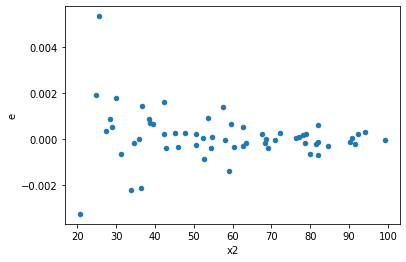

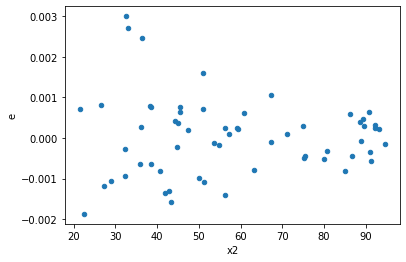

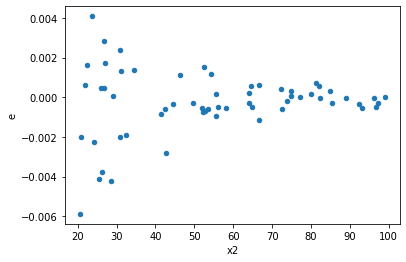

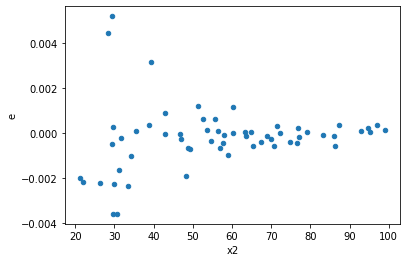

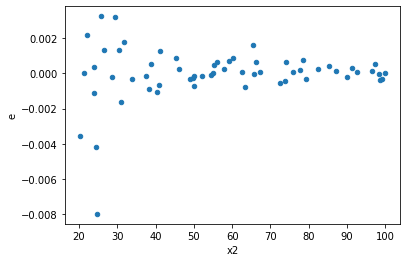

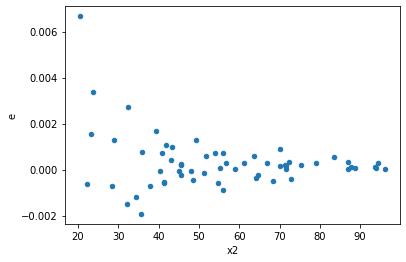

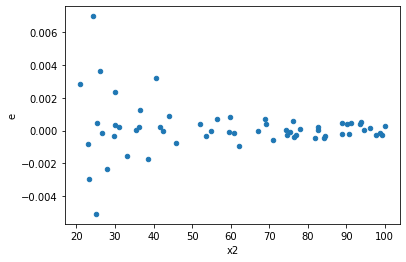

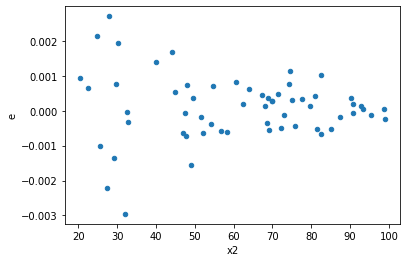

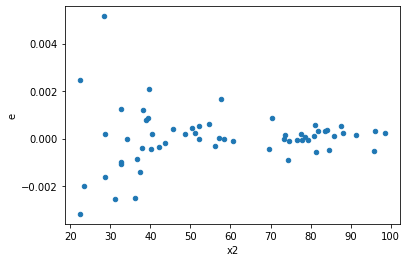

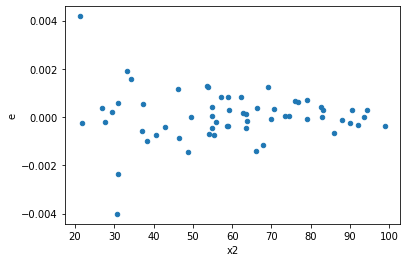

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
8.0,29.0,27.0,7.660660454757802e-06,7.254356487518177e-05,2.641607053364759e-07,2.6867986990808064e-06,10.171076336499345,4.0162224435036364e-08,0.9999999799188878,2.0081112217518182e-08,Reject005=0 : Heteroscedasticity
11.0,26.0,30.0,8.397179960729848e-06,0.00011260767847190172,3.229684600280711e-07,3.7535892823967242e-06,11.622154318320982,2.6145823284196013e-09,0.9999999986927088,1.3072911642098006e-09,Reject005=0 : Heteroscedasticity
13.0,37.0,19.0,2.4427814271318238e-05,5.200319755329587e-05,6.602111965221145e-07,2.7370103975418878e-06,4.145658861830903,0.0016540829957754077,0.9991729585021123,0.0008270414978877039,Reject005=0 : Heteroscedasticity
14.0,29.0,27.0,8.460128108285658e-06,4.911738323571156e-05,2.9172855545812617e-07,1.8191623420633912e-06,6.235804853613339,7.814423191199182e-06,0.9999960927884044,3.907211595599591e-06,Reject005=0 : Heteroscedasticity
15.0,32.0,24.0,1.6290175755889885e-05,2.5333180841827786e-05,5.090679923715589e-07,1.0555492017428243e-06,2.073493555989274,0.06823125641910188,0.9658843717904491,0.03411562820955094,Reject005=1 : Homoscedasticity
16.0,35.0,21.0,1.715027212604566e-05,1.9095193602022664e-05,4.90007775029876e-07,9.092949334296506e-07,1.8556745010305407,0.13700842250727185,0.9314957887463641,0.06850421125363593,Reject005=1 : Homoscedasticity
17.0,27.0,29.0,5.460936814350703e-06,0.0001296789452555857,2.0225691905002606e-07,4.47168776743399e-06,22.108948304151546,9.880984919163893e-13,0.999999999999506,4.940492459581947e-13,Reject005=0 : Heteroscedasticity
18.0,29.0,27.0,2.1492964747239412e-05,0.0001069683728850147,7.411367154220486e-07,3.961791588333878e-06,5.34556109000455,3.599942286869329e-05,0.9999820002885657,1.7999711434346644e-05,Reject005=0 : Heteroscedasticity
20.0,22.0,34.0,7.971867534226514e-06,0.00014544138459466073,3.6235761519211427e-07,4.277687782195904e-06,11.805154915615518,6.393470197707529e-10,0.9999999996803265,3.1967350988537646e-10,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,35.0,2.5179236091001628e-05,2.831884934129363e-05,1.1990112424286489e-06,8.09109981179818e-07,0.6748143408071228,0.34371915923209717,Reject005=1 : Homoscedasticity
1.0,39.0,17.0,4.659240848210443e-05,4.0383085711935434e-06,1.1946771405667803e-06,2.375475630113849e-07,0.19883829274467182,3.0239922376629028e-05,Reject005=0 : Heteroscedasticity
2.0,30.0,26.0,0.00014165366813995164,8.055733610191471e-06,4.721788937998388e-06,3.0983590808428735e-07,0.06561833071167086,7.909379310329892e-11,Reject005=0 : Heteroscedasticity
3.0,34.0,22.0,0.00010836898009117779,9.304501017099588e-06,3.1873229438581704e-06,4.229318644136176e-07,0.13269187712170444,2.4756690704923066e-07,Reject005=0 : Heteroscedasticity
4.0,30.0,26.0,0.00012933349069299067,8.549183809358876e-06,4.3111163564330224e-06,3.288147618984183e-07,0.07627137258955279,5.612350680409391e-10,Reject005=0 : Heteroscedasticity
5.0,21.0,35.0,6.345924854744718e-05,1.2271676090327438e-05,3.0218689784498657e-06,3.5061931686649825e-07,0.11602730607015138,2.717421414148524e-06,Reject005=0 : Heteroscedasticity
6.0,31.0,25.0,0.0001205996163561163,1.3280141243883966e-05,3.890310205036009e-06,5.312056497553586e-07,0.13654583356044783,5.633960149643139e-07,Reject005=0 : Heteroscedasticity
7.0,35.0,21.0,4.541639392238345e-05,4.926242304768491e-06,1.2976112549252414e-06,2.3458296689373764e-07,0.18078061977603033,9.402857167035475e-06,Reject005=0 : Heteroscedasticity
8.0,29.0,27.0,7.660660454757802e-06,7.254356487518177e-05,2.641607053364759e-07,2.6867986990808064e-06,10.171076336499345,4.0162224435036364e-08,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    912
Reject005=1 : Homoscedasticity       88
Name: Result_test, dtype: int64